In [1]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib.transforms as transforms
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from skimage import metrics
from math import sqrt
import seaborn as sns
from math import pi
import netCDF4
import numpy as np
import pandas as pd
import os
# %matplotlib widget

path = os.path.abspath("..")
path_nonelastic = os.path.abspath('../Step0_phase_field_simulation/nonelastic/exodus_files/Ti_Cr_non_elastic.e')
path_elastic = os.path.abspath('../Step0_phase_field_simulation/elastic/exodus_files/Ti_Cr_elastic.e')

### Loading .e file

In [2]:
model = netCDF4.Dataset(path_elastic)

X_all = model.variables['coordx'][:]
Y_all = model.variables['coordy'][:]
# elem_node = model.variables['connect1'][:]
c = model.variables['vals_nod_var2'][:]

points = np.vstack([X_all,Y_all,c]).T

column_names = ['X', 'Y'] + list(range(c.shape[0]))

df = pd.DataFrame(points, columns=column_names)
df = df.sort_values(by = ['X', 'Y'], ascending = [True, True], ignore_index=True)
df_c = df.iloc[:, 2:]

x_dim = int(df_c.shape[0]**0.5)
y_dim = int(df_c.shape[0]**0.5)
t_dim = int(df_c.shape[1])

npa = df_c.to_numpy().flatten().reshape(x_dim, y_dim, t_dim)
npa = np.rot90(npa)


### Loading numpy file

In [4]:
path

'/home/enlightenment/members_directory/upadesh_subedi/codes/1_tensor_Gen_micro/tensor_decomp'

In [5]:
ot = np.load(path+'/Step1_decomposition/elastic_tensor.npy')
x_y_coord = np.load(path+'/Step1_decomposition/xy_deformed.npy')

x_dim = int(x_y_coord.shape[1]**0.5)
y_dim = int(x_y_coord.shape[1]**0.5)
t_dim = int(x_y_coord.shape[0])

In [6]:
cp1  = np.load(path+'/Step1_decomposition/reconstructed_tensors/elastic_reconstruction/recon_cpd_tensor_1.npy',) # allow_pickle=True)
cp2  = np.load(path+'/Step1_decomposition/reconstructed_tensors/elastic_reconstruction/recon_cpd_tensor_2.npy',) # allow_pickle=True)
cp3  = np.load(path+'/Step1_decomposition/reconstructed_tensors/elastic_reconstruction/recon_cpd_tensor_3.npy',) # allow_pickle=True)

cp1.shape, cp2.shape, cp3.shape

((401, 401, 317), (401, 401, 317), (401, 401, 317))

In [7]:
tt1  = np.load(path+'/Step1_decomposition/reconstructed_tensors/elastic_reconstruction/recon_ttd_tensor_1.npy',) # allow_pickle=True)
tt2  = np.load(path+'/Step1_decomposition/reconstructed_tensors/elastic_reconstruction/recon_ttd_tensor_2.npy',) # allow_pickle=True)
tt3  = np.load(path+'/Step1_decomposition/reconstructed_tensors/elastic_reconstruction/recon_ttd_tensor_3.npy',) # allow_pickle=True)

tt1.shape, tt2.shape, tt3.shape

((401, 401, 317), (401, 401, 317), (401, 401, 317))

In [8]:
ot_1 = np.transpose(ot[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
ot_1 = np.concatenate((x_y_coord, ot_1), axis=2)
ot_1.shape

(317, 160801, 3)

In [9]:
cp_1 = np.transpose(cp1[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
cp_1 = np.concatenate((x_y_coord, cp_1), axis=2)

cp_2 = np.transpose(cp2[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
cp_2 = np.concatenate((x_y_coord, cp_2), axis=2)

cp_3 = np.transpose(cp3[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
cp_3 = np.concatenate((x_y_coord, cp_3), axis=2)

cp_1.shape, cp_2.shape, cp_3.shape

((317, 160801, 3), (317, 160801, 3), (317, 160801, 3))

In [10]:
tt_1 = np.transpose(tt1[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
tt_1 = np.concatenate((x_y_coord, tt_1), axis=2)

tt_2 = np.transpose(tt2[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
tt_2 = np.concatenate((x_y_coord, tt_2), axis=2)

tt_3 = np.transpose(tt3[::-1, :, :].reshape(x_dim*y_dim, t_dim), (1,0))[:, :, np.newaxis]
tt_3 = np.concatenate((x_y_coord, tt_3), axis=2)

tt_1.shape, tt_2.shape, tt_3.shape

((317, 160801, 3), (317, 160801, 3), (317, 160801, 3))

### Visualization of No Elastic Effect, Elasti Effect and Reconstructed Tensor for Elastic Effect 

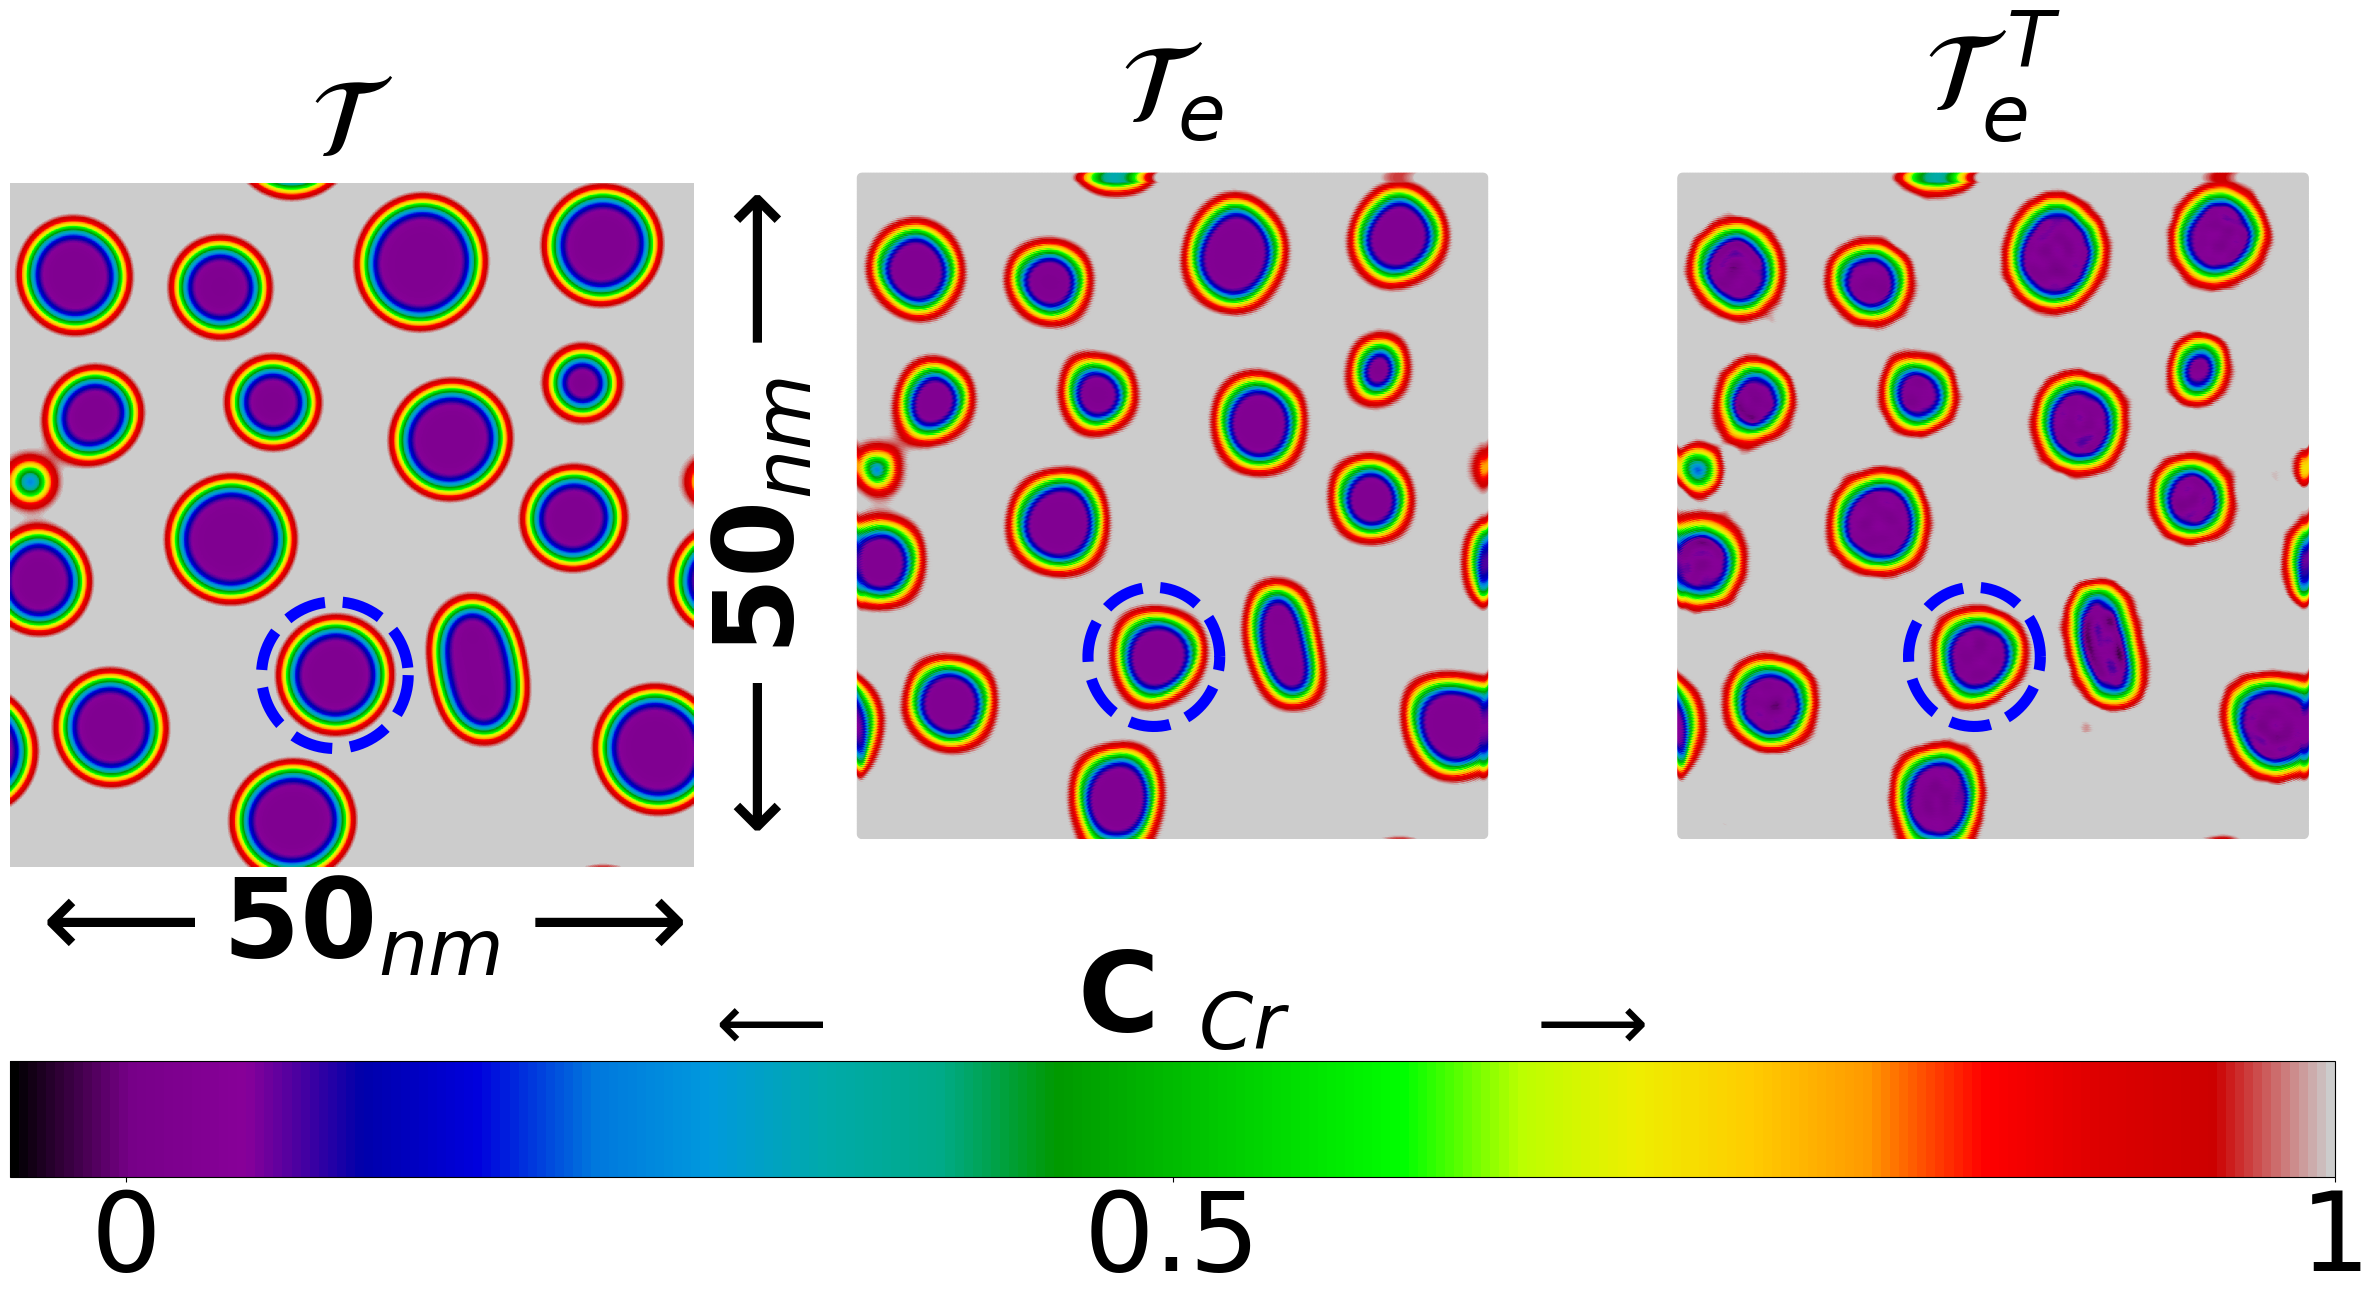

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[30, 14],)#  gridspec_kw={'width_ratios': [1, 1.05, 1.05] , 'height_ratios': [1, ]})

hmap0 = ax0.imshow(npa[:,:,-1], vmin=0.0, vmax=1.0, cmap='nipy_spectral')
hmap1 = ax1.scatter(ot_1[-1,:,0], ot_1[-1,:,1], c= ot_1[-1,:,2], vmin=0.0, vmax=1.0, cmap='nipy_spectral', )
hmap2 = ax2.scatter(tt_1[-1,:,0], tt_1[-1,:,1], c= tt_1[-1,:,2], vmin=0.0, vmax=1.0, cmap='nipy_spectral')


cbar = fig.colorbar(hmap0, ax=[ax0, ax1, ax2,], orientation='horizontal', aspect=20, pad=0.18)
cbar.set_ticks([0.05, 0.5, 1],labels=['0', '0.5', '1']) 
cbar.ax.tick_params(labelsize=80,) 
cbar.set_label('$_{\longleftarrow}$      C $_{Cr}$      $_{\longrightarrow}$',  labelpad=-250, fontsize=80, rotation=00, weight='bold')


ax0.set_title("$\mathcal{T}$", fontsize=80, weight='bold', pad=20)
ax1.set_title("$\mathcal{T}_{e}$", fontsize=80, weight='bold', pad=0)
ax2.set_title("$\mathcal{T}^{\ T}_{e}$", fontsize=80, weight='bold', pad=0)


ax0.set_xlabel('$\longleftarrow$50$_{nm}$$\longrightarrow$', fontsize = 80, weight ='bold',)
ax0.annotate('$\longleftarrow$50$_{nm}$$\longrightarrow$', xy=(1, 0.5), xytext=(1.10, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 80, weight = 'bold', color='k', ha='center', va='center')


ax0.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax0.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax1.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax2.spines[['top', 'right', 'bottom', 'left']].set_visible(False)


###################################
C = (190,288, 23.5, 13.5) 
r = (43, 5.3)
theta = np.linspace(0, 2 * np.pi, 100)
x0 = C[0] + r[0] * np.cos(theta)
y0 = C[1] + r[0] * np.sin(theta)
x1 = C[2] + r[1] * np.cos(theta)
y1 = C[3] + r[1] * np.sin(theta)

ax0.plot(x0, y0, linestyle='--', color='b', linewidth=8)
ax1.plot(x1, y1, linestyle='--', color='b', linewidth=8)
ax2.plot(x1, y1, linestyle='--', color='b', linewidth=8)
#################################

plt.savefig('figures\elas_comparison.png', transparent=True)
plt.show()

## $\mu$SIM

In [12]:
from skimage import metrics

In [13]:
def scale_array(arr):
  scaled_arry = []
  for f in range(arr.shape[-1]):
    arr_min = np.min(arr[:,:,f])
    arr_max = np.max(arr[:,:,f])
    scaled_arry.append(((arr[:,:,f] - arr_min) / (arr_max - arr_min) * 255).astype(np.uint8))
  scaled_arry = np.array(scaled_arry).transpose(1,2,0)
  return scaled_arry

ot_scaled = scale_array(ot)
cp1_scaled = scale_array(cp1)
cp2_scaled = scale_array(cp2)
cp3_scaled = scale_array(cp3)

tt1_scaled = scale_array(tt1)
tt2_scaled = scale_array(tt2)
tt3_scaled = scale_array(tt3)


In [14]:
x_, y_, t_ = ot_scaled.shape[0], ot_scaled.shape[1], ot_scaled.shape[2]

rmse_cp1, msim_cp1  = [np.zeros((t_)) for _ in range(2)]
rmse_cp2, msim_cp2  = [np.zeros((t_)) for _ in range(2)]
rmse_cp3, msim_cp3  = [np.zeros((t_)) for _ in range(2)]


for f in range(t_):
  rmse_cp1[f] = metrics.normalized_root_mse(ot[:,:,f], cp1[:,:,f])
  msim_cp1[f] = metrics.structural_similarity(ot_scaled[:,:,f], cp1_scaled[:,:,f], win_size=3)

  rmse_cp2[f] = metrics.normalized_root_mse(ot[:,:,f], cp2[:,:,f])
  msim_cp2[f] = metrics.structural_similarity(ot_scaled[:,:,f], cp2_scaled[:,:,f], win_size=3)

  rmse_cp3[f] = metrics.normalized_root_mse(ot[:,:,f], cp3[:,:,f])
  msim_cp3[f] = metrics.structural_similarity(ot_scaled[:,:,f], cp3_scaled[:,:,f], win_size=3)


rmse_cp1_all = metrics.normalized_root_mse(ot, cp1)
msim_cp1_all = metrics.structural_similarity(ot_scaled, cp1_scaled, win_size=3)

rmse_cp2_all = metrics.normalized_root_mse(ot, cp2)
msim_cp2_all = metrics.structural_similarity(ot_scaled, cp2_scaled, win_size=3)

rmse_cp3_all = metrics.normalized_root_mse(ot, cp3)
msim_cp3_all = metrics.structural_similarity(ot_scaled, cp3_scaled, win_size=3)

In [15]:
x_, y_, t_ = ot_scaled.shape[0], ot_scaled.shape[1], ot_scaled.shape[2]

rmse_tt1, msim_tt1  = [np.zeros((t_)) for _ in range(2)]
rmse_tt2, msim_tt2  = [np.zeros((t_)) for _ in range(2)]
rmse_tt3, msim_tt3  = [np.zeros((t_)) for _ in range(2)]


for f in range(t_):
  rmse_tt1[f] = metrics.normalized_root_mse(ot[:,:,f], tt1[:,:,f])
  msim_tt1[f] = metrics.structural_similarity(ot_scaled[:,:,f], tt1_scaled[:,:,f], win_size=3)

  rmse_tt2[f] = metrics.normalized_root_mse(ot[:,:,f], tt2[:,:,f])
  msim_tt2[f] = metrics.structural_similarity(ot_scaled[:,:,f], tt2_scaled[:,:,f], win_size=3)

  rmse_tt3[f] = metrics.normalized_root_mse(ot[:,:,f], tt3[:,:,f])
  msim_tt3[f] = metrics.structural_similarity(ot_scaled[:,:,f], tt3_scaled[:,:,f], win_size=3)


rmse_tt1_all = metrics.normalized_root_mse(ot, tt1)
msim_tt1_all = metrics.structural_similarity(ot_scaled, tt1_scaled, win_size=3)

rmse_tt2_all = metrics.normalized_root_mse(ot, tt2)
msim_tt2_all = metrics.structural_similarity(ot_scaled, tt2_scaled, win_size=3)

rmse_tt3_all = metrics.normalized_root_mse(ot, tt3)
msim_tt3_all = metrics.structural_similarity(ot_scaled, tt3_scaled, win_size=3)

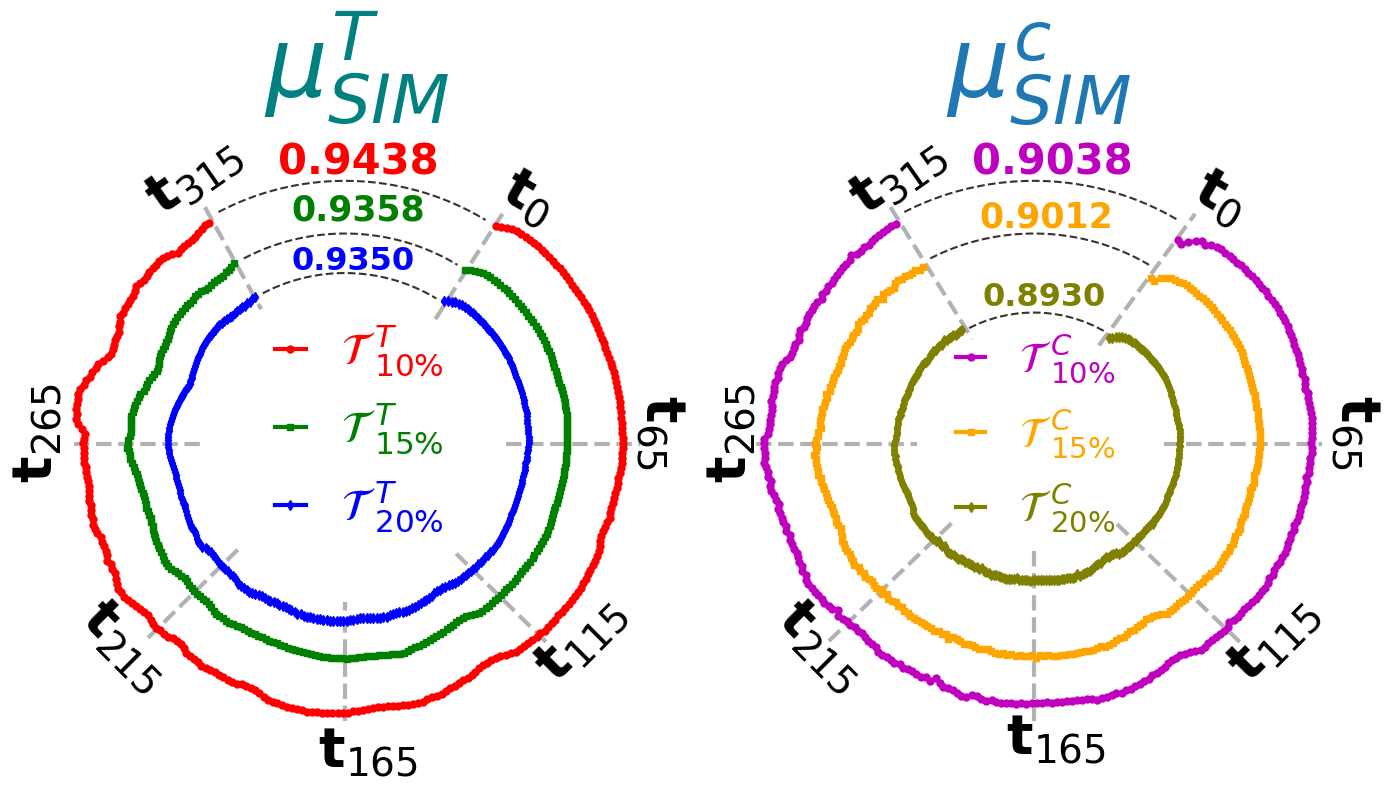

In [16]:
def wrap_around(radii, s,):
    thetas = [i * (330 / len(radii)) for i in range(32, len(radii))]
    xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    return xs,ys

def labels(radii, s,):
    thetas = [i * (60 / len(radii)) for i in range(-145, len(radii))]
    xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    return  xs,ys
  
###################################################
###################################################
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


x0,y0 = wrap_around(msim_tt1[8:], s=21)
x1,y1 = wrap_around(msim_tt2[8:], s=17)
x2,y2 = wrap_around(msim_tt3[8:], s=14)

a =  np.ones(len(msim_tt1[8:]))
l0 = labels(a , 20.0)
l1 = labels(a , 16.0)
l2 = labels(a , 13.0)

ax1.plot([6.75, 11.75], [9.5, 17.5], '--', color = 'black', linewidth=3,  alpha=0.3)
ax1.text(11, 17, s="t$_0$", color='k',fontsize=40, weight = 'bold', rotation=-30)
ax1.hlines(y=0, xmin=12.0, xmax=22,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.3)
ax1.text(21.5, -1, s="t$_{65}$", color='k',fontsize=40, weight = 'bold', rotation=270)
ax1.plot([15, 8.0], [-15, -8.0], '--', color = 'black', linewidth=3,  alpha=0.3)
ax1.text(13.5, -18, s="t$_{115}$", color='k',fontsize=40, weight = 'bold', rotation=45)
ax1.vlines(x=0, ymin=-21, ymax=-12,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.3)
ax1.text(-2, -24.5, s="t$_{165}$", color='k',fontsize=40, weight = 'bold', rotation=0)
ax1.plot([-8, -15], [-8, -15], '--', color = 'black', linewidth=3,  alpha=0.3)
ax1.text(-20.5, -18.5, s="t$_{215}$", color='k',fontsize=40, weight = 'bold', rotation=-45)
ax1.hlines(y=0, xmin=-20.25, xmax=-10.5,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.3)
ax1.text(-25.0, -2, s="t$_{265}$", color='k',fontsize=40, weight = 'bold', rotation=90)
ax1.plot([-10.45, -6.25], [18, 10.25], '--', color = 'black', linewidth=3,  alpha=0.3)
ax1.text(-15.5, 17.5, s="t$_{315}$", color='k',fontsize=40, weight = 'bold', rotation=35)

ax1.plot(x0, y0, '-o', color='red', label=r'$\mathcal{T}_{\ 10\%}^{\  T}$', linewidth=3, markersize=5)
ax1.plot(x1, y1, '-s', color='green', label=r'$\mathcal{T}_{\ 15\%}^{\  T}$', linewidth=3, markersize=5)
ax1.plot(x2, y2, '-d', color='blue', label=r'$\mathcal{T}_{\ 20\%}^{\  T}$', linewidth=3, markersize=5)

l0 = ax1.plot(l0[0], l0[1], '--', color = 'black', alpha=0.8)
l1 = ax1.plot(l1[0], l1[1], '--', color = 'black', alpha=0.8)
l2 = ax1.plot(l2[0], l2[1], '--', color = 'black', alpha=0.8)

ax1.text(-5.0, 20.5,  s=f"{msim_tt1_all:.4F}", color='red',fontsize=30, weight = 'bold')
ax1.text(-4.0, 17.0,  s=f"{msim_tt2_all:.4F}", color='green',fontsize=25, weight = 'bold')
ax1.text(-4.0, 13.25, s=f"{msim_tt3_all:.4F}", color='blue',fontsize=23, weight = 'bold')

ax1.legend(loc=(0.34,0.33), prop={'weight':'bold', 'size':'32'}, frameon=False, handlelength=0.7, labelcolor='linecolor').get_frame().set_facecolor('none')
ax1.set_title("$\mu_{SIM}^{T}$", color='teal',fontsize=70, weight = 'bold', rotation=0, pad=40)
ax1.axis(False)
# ax1.text(-25,25,"(a)", fontsize=60, weight = 'bold', color = 'k')

#########################################################################
#########################################################################

x0,y0 = wrap_around(msim_cp1[8:], s=21)
x1,y1 = wrap_around(msim_cp2[8:], s=17)
x2,y2 = wrap_around(msim_cp3[8:], s=11)

a =  np.ones(len(msim_cp1[8:]))
l0 = labels(a , 20.0)
l1 = labels(a , 16.0)
l2 = labels(a , 10.0)

ax2.plot([4.75, 11.75], [7.5, 17.5], '--', color = 'black', linewidth=3,  alpha=0.3)
ax2.text(11, 17, s="t$_0$", color='k',fontsize=40, weight = 'bold', rotation=-30)
ax2.hlines(y=0, xmin=9.5, xmax=21,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.3)
ax2.text(21.5, -1, s="t$_{65}$", color='k',fontsize=40, weight = 'bold', rotation=270)
ax2.plot([15, 6.0], [-15, -6.0], '--', color = 'black', linewidth=3,  alpha=0.3)
ax2.text(13.5, -18, s="t$_{115}$", color='k',fontsize=40, weight = 'bold', rotation=45)
ax2.vlines(x=0, ymin=-21, ymax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.3)
ax2.text(-2, -23.5, s="t$_{165}$", color='k',fontsize=40, weight = 'bold', rotation=0)
ax2.plot([-6, -15], [-6, -15], '--', color = 'black', linewidth=3,  alpha=0.3)
ax2.text(-19.5, -18.5, s="t$_{215}$", color='k',fontsize=40, weight = 'bold', rotation=-45)
ax2.hlines(y=0, xmin=-20.25, xmax=-8.5,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.3)
ax2.text(-24.0, -2, s="t$_{265}$", color='k',fontsize=40, weight = 'bold', rotation=90)
ax2.plot([-10.45, -4.5], [18, 8], '--', color = 'black', linewidth=3,  alpha=0.3)
ax2.text(-14, 17.5, s="t$_{315}$", color='k',fontsize=40, weight = 'bold', rotation=35)

ax2.plot(x0, y0, '-o', color='m', label=r'$\mathcal{T}_{\ 10\%}^{\  C}$', linewidth=3, markersize=5)
ax2.plot(x1, y1, '-s', color='orange', label=r'$\mathcal{T}_{\ 15\%}^{\  C}$', linewidth=3, markersize=5)
ax2.plot(x2, y2, '-d', color='olive', label=r'$\mathcal{T}_{\ 20\%}^{\  C}$', linewidth=3, markersize=5)

l0 = ax2.plot(l0[0], l0[1], '--', color = 'black', alpha=0.8)
l1 = ax2.plot(l1[0], l1[1], '--', color = 'black', alpha=0.8)
l2 = ax2.plot(l2[0], l2[1], '--', color = 'black', alpha=0.8)

ax2.text(-4.5, 20.5,  s=f"{msim_cp1_all:.4F}", color='m',fontsize=30, weight = 'bold')
ax2.text(-4.0, 16.5,  s=f"{msim_cp2_all:.4F}", color='orange',fontsize=25, weight = 'bold')
ax2.text(-3.75, 10.5, s=f"{msim_cp3_all:.4F}", color='olive',fontsize=23, weight = 'bold')

ax2.legend(loc=(0.34,0.33), prop={'weight':'bold', 'size':'30'}, frameon=False, handlelength=0.7, labelcolor='linecolor').get_frame().set_facecolor('none')
ax2.set_title("$\mu_{SIM}^{c}$", color='tab:blue',fontsize=70, weight = 'bold', rotation=0, pad=40)
ax2.axis(False)
# ax2.text(-25,25,"(b)", fontsize=60, weight = 'bold', color = 'k')



plt.tight_layout()

# plt.savefig('figures\mu_SIM_Elas.png', transparent=True)

plt.show()

